In [7]:
import urllib.request
from bs4 import BeautifulSoup
import time
#import konlpy.tag
import re
#먼저 pip install kornounextractor
#from kornounextractor.noun_extractor import extract
from collections import Counter
import networkx as nx
import itertools
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import requests
#from ckonlpy.tag import Twitter

#from wordcloud import WordCloud
import matplotlib.pyplot as plt
#from kr_sna_c import do_kr_sna
from matplotlib import rcParams
import matplotlib.font_manager as fm

#from selenium.common.exceptions import NoSuchElementException
#from selenium.common.exceptions import WebDriverException

In [2]:
#원하는 조건의 기사 url 모두 수집
#1168건
url_zip=[]
for i in range(116):
    url='http://search.khan.co.kr/search.html?stb=khan&dm=5&q=%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80&pg='+str(i)+'&sort=1&d1=20170530~20181130'
    r=urllib.request.urlopen(url)
    soup = BeautifulSoup(r.read(), 'lxml')
    for j in range(0,10):
        url_zip.append(soup.find_all('dt')[j].a.get('href'))
        
        
url='http://search.khan.co.kr/search.html?stb=khan&dm=5&q=%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80&pg=116&sort=1&d1=20170530~20181130'
r=urllib.request.urlopen(url)
soup = BeautifulSoup(r.read(), 'lxml')
for j in range(0,8):
    url_zip.append(soup.find_all('dt')[j].a.get('href'))


In [30]:
import numpy as np
file=open("urlkyung.txt","w",encoding='UTF8')
for i in range(len(url_zip)):
        print(url_zip[i], file=file)

In [18]:
import time
from selenium import webdriver

aa=[]
driver=webdriver.Chrome(executable_path=r'C:\Users\user\Documents\Python Scripts\chromedriver.exe')
for i in range(len(url_zip)):
    driver.get(url_zip[i])
    try:
        element=driver.find_element_by_xpath(full)
        soup=BeautifulSoup(element.get_attribute('innerHTML'),'lxml')
        time.sleep(1)
        for j in range(len(soup.find_all('p',attrs={'class':'content_text'}))):
            a=soup.find_all('p',attrs={'class':'content_text'})[j].text
            time.sleep(1)
        aa.append(a)
    except NoSuchElementException:
        pass
    except WebDriverException:
        pass
    time.sleep(1)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
aa=" ".join(str(x) for x in aa)
a=aa.replace('\xa0','')
a=aa.replace('■','')
a=aa.replace('▶바로가기','')
a

'▶관련기사 [날씨가 왜 이래]미세먼지와 이동성고기압의 관계는?\xa0 윤상진 대표원장은 “목 뒤쪽의 풍지라는 혈자리는 바람으로 인해 상하기 쉬운 곳이어서 이곳을 따뜻하게 보호하는 것이 중요하다”며 “외출 시 목도리를 둘러 뒷목을 따뜻하게 하고 젖은 머리를 말릴 때도 드라이기를 이용해 목 뒤쪽을 잠깐씩 덥혀주면 추위를 이기고 감기를 예방하는 데 도움이 된다”고 조언했다.\xa0 30일에도 대기 정체로 미세먼지가 쌓이면서 공기질이 좋지 않다. 경기도·대전·세종·충북·호남권·영남권·제주권은 ‘나쁨’, 그 밖의 권역은 ‘보통’으로 예상됐다.\xa0 ▶관련기사 북극 해빙, 엘니뇨, 감축 목표 낮춘 중국...올 겨울 ‘더 독한’ 미세먼지 올까\xa0 기온은 당분간 평년과 비슷하다. 내륙 지방에선 낮과 밤의 일교차가 크기 때문에 건강관리에 유의해야 한다. 30일 아침 최저기온은 -7~8도, 낮 최고기온은 6~15도로 전망됐다.\xa0 현재 배출가스 등급은 전기차와 수소차는 1등급, 휘발유와 가스차는 1~5등급, 경유차는 3~5등급을 받도록 되어 있다. 이번에 1등급으로 분류된 차량은 90만대이다. 나머지 2~4등급 차량은 내년 상반기에 분류할 계획이다. 이형섭 환경부 교통환경과장은 “5등급 차량에 포함된 저소득층과 생계형 노후경유차는 조기폐차, 저감장치 부착, LPG차 전환 등 지원을 확대할 계획”이라고 말했다.\xa0 견본주택은 경기 화성시 태안로 157에 있다. 1호선 병점역 2번 출구 남서쪽 200m 거리에 위치해 있다. 입주는 2021년 3월 예정이다.\xa0 가락시장 경매장의 대형 선풍기로는 기후 변화에 대비할 수 없다. 시민에게 신선하고 안전한 먹을거리를 제공하는 일은 사회의 책임이다. 가락시장 현대화, 더 늦추어서는 안된다.\xa0 토드는 정부가 탄소세 강화에 그칠 것이 아니라 종합적인 대책을 내놓아야 한다고 강조했다. 그는 “탄소세는 퍼즐 조각의 하나일 뿐”이라며 “정부는 출근하기 위해, 자녀를 학교에 데려다주기 위해 자가용 승용차에 의존해야 하는 수백만명

In [21]:
file=open("k_project.txt","w",encoding='UTF8')
print(a, file=file)

In [37]:
news_content=a.strip()
filtered_content=re.sub(r'[^\s\d\w\?\!\,]','',news_content)

In [38]:
filtered_content

'관련기사 날씨가 왜 이래미세먼지와 이동성고기압의 관계는?\xa0 윤상진 대표원장은 목 뒤쪽의 풍지라는 혈자리는 바람으로 인해 상하기 쉬운 곳이어서 이곳을 따뜻하게 보호하는 것이 중요하다며 외출 시 목도리를 둘러 뒷목을 따뜻하게 하고 젖은 머리를 말릴 때도 드라이기를 이용해 목 뒤쪽을 잠깐씩 덥혀주면 추위를 이기고 감기를 예방하는 데 도움이 된다고 조언했다\xa0 30일에도 대기 정체로 미세먼지가 쌓이면서 공기질이 좋지 않다 경기도대전세종충북호남권영남권제주권은 나쁨, 그 밖의 권역은 보통으로 예상됐다\xa0 관련기사 북극 해빙, 엘니뇨, 감축 목표 낮춘 중국올 겨울 더 독한 미세먼지 올까\xa0 기온은 당분간 평년과 비슷하다 내륙 지방에선 낮과 밤의 일교차가 크기 때문에 건강관리에 유의해야 한다 30일 아침 최저기온은 78도, 낮 최고기온은 615도로 전망됐다\xa0 현재 배출가스 등급은 전기차와 수소차는 1등급, 휘발유와 가스차는 15등급, 경유차는 35등급을 받도록 되어 있다 이번에 1등급으로 분류된 차량은 90만대이다 나머지 24등급 차량은 내년 상반기에 분류할 계획이다 이형섭 환경부 교통환경과장은 5등급 차량에 포함된 저소득층과 생계형 노후경유차는 조기폐차, 저감장치 부착, LPG차 전환 등 지원을 확대할 계획이라고 말했다\xa0 견본주택은 경기 화성시 태안로 157에 있다 1호선 병점역 2번 출구 남서쪽 200m 거리에 위치해 있다 입주는 2021년 3월 예정이다\xa0 가락시장 경매장의 대형 선풍기로는 기후 변화에 대비할 수 없다 시민에게 신선하고 안전한 먹을거리를 제공하는 일은 사회의 책임이다 가락시장 현대화, 더 늦추어서는 안된다\xa0 토드는 정부가 탄소세 강화에 그칠 것이 아니라 종합적인 대책을 내놓아야 한다고 강조했다 그는 탄소세는 퍼즐 조각의 하나일 뿐이라며 정부는 출근하기 위해, 자녀를 학교에 데려다주기 위해 자가용 승용차에 의존해야 하는 수백만명에게 대안을 제시해야 한다고 말했다 컬럼비아대 연구를 이끈 노아 카우프만 박사는 미국 온라인

In [40]:
## 빈도분석을 위한 함수 생성
def cntWord(text , n = None):
    ## ckonlpy를 이용
    twitter = Twitter()
    ## 사용자 지정 사전 등록 kornounextractor 사용
    #for word in sorted(extract(text, freq=2.0)):
     #   if word == '갑지':
      #      word ='갑질'
       # twitter.add_dictionary(word, 'Noun')

    #twitter.add_dictionary('양진호', 'Noun')
    #twitter.add_dictionary('위디스크', 'Noun')
    #twitter.add_dictionary('한국미래기술', 'Noun')
    #twitter.add_dictionary('헤비업로더', 'Noun')
    
    ## 포스 태깅
    twitter_morphs = twitter.pos(text)
    ## 명사 동사 형용사만 추출
    Noun_words = []
    for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
        if pos == 'Noun':
            Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
    stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','경향','연합뉴스','com','kr']
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
    for word in unique_Noun_words:
        if len(word)==1:
            while word in Noun_words: 
                Noun_words.remove(word)
    c = Counter(Noun_words)
    if n == None:
        return c.most_common(len(c))
    else:
        return c.most_common(n)

In [41]:
print(cntWord(filtered_content,100))

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('미세먼지', 401), ('농도', 130), ('위해', 112), ('환경', 106), ('정책', 95), ('시민', 90), ('사업', 87), ('정부', 86), ('대한', 84), ('대기', 82), ('계획', 76), ('수준', 75), ('바다', 74), ('관리', 72), ('문제', 72), ('지역', 71), ('에너지', 69), ('우리', 68), ('건강', 67), ('때문', 65), ('배출', 63), ('서울', 62), ('발생', 61), ('관계자', 60), ('서울시', 59), ('대책', 58), ('중국', 57), ('환경부', 57), ('통해', 56), ('한국', 56), ('이번', 55), ('연구', 55), ('예정', 54), ('공기', 53), ('물질', 52), ('국민', 51), ('기온', 50), ('차량', 50), ('대통령', 50), ('사회', 47), ('효과', 47), ('관련', 46), ('요하', 46), ('경우', 46), ('발전', 45), ('마련', 45), ('개선', 45), ('지난', 43), ('시간', 42), ('교육', 42), ('사용', 42), ('예상', 41), ('전국', 41), ('남해', 40), ('영향', 40), ('가능', 40), ('사람', 40), ('보통', 39), ('안전', 39), ('경제', 39), ('도시', 39), ('석탄', 37), ('시장', 37), ('동해', 37), ('서해', 37), ('앞바다', 37), ('시설', 37), ('교수', 37), ('학교', 36), ('기준', 36), ('기대', 36), ('산업', 36), ('국내', 36), ('마스크', 36), ('지속', 36), ('대해', 36), ('전망', 35), ('현재', 35), ('강화', 35), ('올해', 35), ('개발', 34), ('미래', 34), ('

In [53]:
type(filtered_content)

str

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


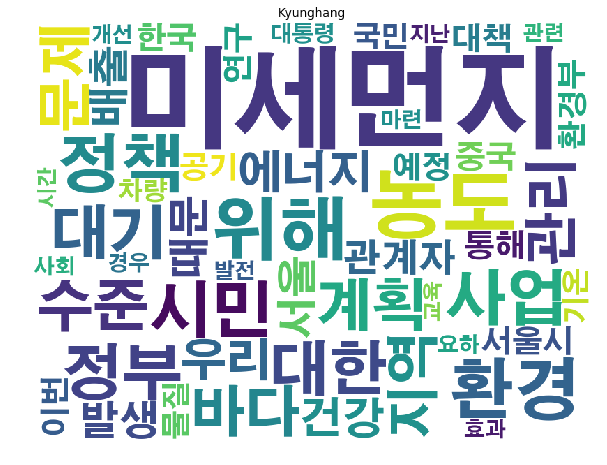

In [33]:
tags = cntWord(filtered_content,50)
font_path = 'C:\Windows\Fonts\H2GTRE.TTF'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.title('Kyunghang')
plt.imshow(cloud)

In [34]:
##네트워크 분석을 시작하기에 앞서 노드를 구성할 단어 선정
##전체 기사에서 높은 빈도를 갖는 단어 탐색
print(cntWord(filtered_content,40))

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('미세먼지', 401), ('농도', 130), ('위해', 112), ('환경', 106), ('정책', 95), ('시민', 90), ('사업', 87), ('정부', 86), ('대한', 84), ('대기', 82), ('계획', 76), ('수준', 75), ('바다', 74), ('관리', 72), ('문제', 72), ('지역', 71), ('에너지', 69), ('우리', 68), ('건강', 67), ('때문', 65), ('배출', 63), ('서울', 62), ('발생', 61), ('관계자', 60), ('서울시', 59), ('대책', 58), ('중국', 57), ('환경부', 57), ('통해', 56), ('한국', 56), ('이번', 55), ('연구', 55), ('예정', 54), ('공기', 53), ('물질', 52), ('국민', 51), ('기온', 50), ('차량', 50), ('대통령', 50), ('사회', 47)]


In [35]:
## 네트워크의 노드를 구성할 단어 선택
subject = ['미세먼지']
korea = ['한국','내륙','차량','대통령','안개','석탄','시설']
china = ['중국','남해','서해','앞바다', '바람']
list_of_words = subject + korea + china

In [36]:
def netwk(content, sword):
    stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','경향','연합뉴스','com','kr']
    from konlpy.tag import Komoran
    komoran= Komoran()
    
    Nouns = komoran.nouns(content)
    final_nouns = Nouns.copy()
    unique_nouns = set(Nouns)
    
    for word in unique_nouns:
        if len(word) == 1:
            while word in final_nouns:
                final_nouns.remove(word)
        if word in stopwords:
            while word in final_nouns:
                final_nouns.remove(word)
                
    g = do_kr_sna(content, final_nouns, stopwords,list_of_words = list_of_words, userdic= False)
    
    yghDict = dict(g[sword])
    
    cntlst = []
    for k in yghDict.keys():
        cntlst.append([k,yghDict[k]['weight']])
    
    return sorted(cntlst, key= lambda x : -x[1])

In [42]:
stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','경향','연합뉴스','com','kr']

In [44]:
twitter = Twitter()
whole_text=filtered_content
    ## 포스 태깅
twitter_morphs = twitter.pos(whole_text)
    ## 명사 동사 형용사만 추출
Noun_words = []
for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
    if pos == 'Noun':
        Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
for word in unique_Noun_words:
    if len(word)==1:
        while word in Noun_words: 
            Noun_words.remove(word)

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [45]:
c = Counter(Noun_words)
if list_of_words == None:
    list_of_words = get_words_list(c.most_common(num))

In [46]:
text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', whole_text.replace('\n', ' '))
text2 = re.sub(r'([\.\?\!])',r'\1 ', text1)

In [47]:
article_sentences = re.split(r'[\.\?\!]\s+', text2)

In [48]:
G = nx.Graph()
G.add_nodes_from(list_of_words)

In [49]:
NN_words=Noun_words
for sentence in article_sentences:
    selected_words =[]
    for noun in set(NN_words):
        if noun in list(G.nodes()):
            selected_words.append(noun)

    for pair in list(itertools.combinations(list(selected_words), 2)):
        if pair[0] == pair[1]:
            continue
        if pair in G.edges(): 
            G[pair[0]][pair[1]]['weight'] += 1
            
        else:
            G.add_edge(pair[0], pair[1], weight=1 )

In [50]:
yghDict = dict(G['미세먼지'])
    
    
cntlst = []
for k in yghDict.keys():
    cntlst.append([k,yghDict[k]['weight']])

In [51]:
sorted(cntlst, key= lambda x : -x[1])

[['남해', 26],
 ['대통령', 26],
 ['시설', 26],
 ['내륙', 26],
 ['서해', 26],
 ['바람', 26],
 ['안개', 26],
 ['석탄', 26],
 ['중국', 26],
 ['한국', 26],
 ['앞바다', 26],
 ['차량', 26]]

{'미세먼지': Text(1,6.87746e-09,'미세먼지'),
 '한국': Text(0.885456,0.464723,'한국'),
 '내륙': Text(0.568065,0.822984,'내륙'),
 '차량': Text(0.120537,0.992709,'차량'),
 '대통령': Text(-0.354605,0.935016,'대통령'),
 '안개': Text(-0.748511,0.663123,'안개'),
 '석탄': Text(-0.970942,0.239316,'석탄'),
 '시설': Text(-0.970942,-0.239316,'시설'),
 '중국': Text(-0.748511,-0.663123,'중국'),
 '남해': Text(-0.354605,-0.935016,'남해'),
 '서해': Text(0.120537,-0.992709,'서해'),
 '앞바다': Text(0.568065,-0.822984,'앞바다'),
 '바람': Text(0.885456,-0.464723,'바람')}

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Noto Sans Korean'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


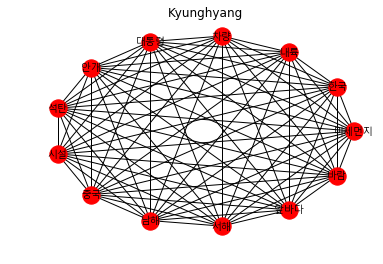

In [54]:
plt.title('Kyunghyang')
rcParams['font.family'] = 'Noto Sans Korean'
font_name = 'Malgun Gothic'
pos=nx.shell_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=10)